<font color='tomato'><font color="#CC3D3D"><p>
# Getting Started with scikit-learn

#### 자주 사용하는 사이킷런 모듈
- 데이터 정제(Data Cleasing) & 속성 공학(Feature Engineering)
    - sklearn.preprocessing: 데이터 전처리(인코딩, 정규화 등)
    - sklearn.feature_selection: 속성선택
    - sklearn.feature_extraction: 속성추출(이미지나 텍스트에서 속성 추출)
- 모형 성능 평가와 개선
    - sklearn.model_selection: 데이터 분리, 검증 및 파라미터 튜닝(GridSearch 등)
    - sklearn.metrics: 성능평가(Recall, Precision, AUC 등)
- 지도학습(Supervised Learning) 알고리즘
    - sklearn.ensemble: 앙상블 알고리즘(RF, AdaBoost 등)
    - sklearn.linear_model: 선형모델(선형회귀, 로지스틱회귀 등) 
    - sklearn.svm: Support Vector Machines (SVM)
    - sklearn.tree: 의사결정나무(Decision Trees)
- 비지도학습(Unsupervised Learning) 알고리즘
    - sklearn.cluster: 군집분석(K-means, DBSCAN 등)
    - sklearn.decomposition: 차원축소(PCA, SVD 등)
- 유틸리티와 데이터 세트 
    - sklearn.pipeline: 워크플로우 효율화
    - sklearn.datasets: 예제 데이터 세트(iris, digits 데이터 등) 
    
#### 사이킷런 기반 머신러닝 프레임워크    
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 **Classifier**로, 회귀 알고리즘을 구현한 클래스를 **Regressor**로 지칭
    - Ex) DecisionTreeClassifier(분류문제에 사용하는 의사결정나무) vs. DecisionTreeRegressor(회귀문제에 사용하는 의사결정나무)
- Classifier와 Regressor를 합쳐서 **Estimator** 클래스라고 함
    - ML 학습을 위해 fit()을, 예측을 위해 predict()를 제공    

## Classification

#### 데이터 준비

In [1]:
import pandas as pd 

In [2]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


타이타닉 호 침몰 당시의 승객 명단 데이터
- Survived: 생존 여부 => 0 = No, 1 = Yes
- pclass: 티켓 등급 => 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 배우자의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓 번호
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 항구 => C = Cherbourg, Q = Queenstown, S = Southampton

*scikit-learn은 class(y)와 feature(X)로 데이터의 열이 구분되어야 한다.*

In [3]:
y = train.Survived
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


*scikit-learn은 모든 feature가 숫자로만 구성되어야 한다.*

In [4]:
X.Sex = X.Sex.map({'male': 1, 'female': 0})
X

C:\Users\msi\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


*scikit-learn은 결측값이 있는 feature를 사용할 수 없다.*

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [6]:
X.Age = X.Age.fillna(X.Age.mean())
X

C:\Users\msi\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [7]:
# 아래 군집분석을 위해 데이터 보관
X_titanic = X.copy()

#### 데이터 분할
<img src="http://www.ds100.org/sp17/assets/notebooks/linear_regression/train_test_split.png" width=600 height=400>

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
857,1,1,51.000000,0,0,26.5500
52,1,0,49.000000,1,0,76.7292
386,3,1,1.000000,5,2,46.9000
124,1,1,54.000000,0,1,77.2875
578,3,0,29.699118,1,0,14.4583
...,...,...,...,...,...,...
835,1,0,39.000000,1,1,83.1583
192,3,0,19.000000,1,0,7.8542
629,3,1,29.699118,0,0,7.7333
559,3,0,36.000000,1,0,17.4000


#### 모형 생성 - 의사결정나무(Decision Tree)
<img align="left" src='http://drive.google.com/uc?export=view&id=1OZmnohHM8_932fiNnokTRdC6ZQumrPeL'/>

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model_dt = DecisionTreeClassifier(random_state=0, max_depth=3)

In [13]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#### 모형 생성 - 로지스틱 회귀분석(Logistic Regression)
<img src="https://www.saedsayad.com/images/LogReg_1.png">

In [14]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### 모형 생성 - 인공신경망(Neural Network)
<img src="https://www.astroml.org/_images/fig_neural_network_1.png">

In [15]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier(random_state=0, hidden_layer_sizes=(50,))
model_nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), random_state=0)

#### 모형 평가

In [16]:
# Decision Tree
model_dt.score(X_test, y_test)

0.8208955223880597

In [17]:
# Logistic Regression
model_lr.score(X_test, y_test)

0.8022388059701493

In [18]:
# Neural Network
model_nn.score(X_test, y_test)

0.8022388059701493

In [19]:
# Final Model
model_best = model_dt

#### 모형 적용

In [20]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


*모형 생성에서 했던 전처리 작업을 동일하게 해야한다.*

In [21]:
test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # feature 선택
test.Sex = test.Sex.map({'male': 1, 'female': 0})  # 문자열 => 숫자
test.Age = test.Age.fillna(X.Age.mean()) # 결측값 처리
test.Fare = test.Fare.fillna(X.Fare.mean()) # 결측값 처리
test

C:\Users\msi\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.500000,0,0,7.8292
1,3,0,47.000000,1,0,7.0000
2,2,1,62.000000,0,0,9.6875
3,3,1,27.000000,0,0,8.6625
4,3,0,22.000000,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,29.699118,0,0,8.0500
414,1,0,39.000000,0,0,108.9000
415,3,1,38.500000,0,0,7.2500
416,3,1,29.699118,0,0,8.0500


*예측 결과*

In [22]:
model_best.predict(test)  # 예측값(0/1) 출력

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
model_dt.predict_proba(test)  # 각 예측값이 발생할 가능성 출력

array([[0.88095238, 0.11904762],
       [0.375     , 0.625     ],
       [0.88095238, 0.11904762],
       [0.88095238, 0.11904762],
       [0.375     , 0.625     ],
       [0.05882353, 0.94117647],
       [0.375     , 0.625     ],
       [0.88095238, 0.11904762],
       [0.375     , 0.625     ],
       [0.88095238, 0.11904762],
       [0.88095238, 0.11904762],
       [0.65882353, 0.34117647],
       [0.05785124, 0.94214876],
       [0.88095238, 0.11904762],
       [0.05785124, 0.94214876],
       [0.05785124, 0.94214876],
       [0.88095238, 0.11904762],
       [0.88095238, 0.11904762],
       [0.375     , 0.625     ],
       [0.375     , 0.625     ],
       [0.65882353, 0.34117647],
       [0.05882353, 0.94117647],
       [0.05785124, 0.94214876],
       [0.65882353, 0.34117647],
       [0.05785124, 0.94214876],
       [0.88095238, 0.11904762],
       [0.05785124, 0.94214876],
       [0.88095238, 0.11904762],
       [0.65882353, 0.34117647],
       [0.88095238, 0.11904762],
       [0.

In [24]:
model_dt.predict_proba(test)[:,1] # 사는 것만 빼낸것 

array([0.11904762, 0.625     , 0.11904762, 0.11904762, 0.625     ,
       0.94117647, 0.625     , 0.11904762, 0.625     , 0.11904762,
       0.11904762, 0.34117647, 0.94214876, 0.11904762, 0.94214876,
       0.94214876, 0.11904762, 0.11904762, 0.625     , 0.625     ,
       0.34117647, 0.94117647, 0.94214876, 0.34117647, 0.94214876,
       0.11904762, 0.94214876, 0.11904762, 0.34117647, 0.11904762,
       0.11904762, 0.11904762, 0.625     , 0.14285714, 0.34117647,
       0.11904762, 0.625     , 0.625     , 0.11904762, 0.11904762,
       0.11904762, 0.34117647, 0.11904762, 0.94214876, 0.94214876,
       0.11904762, 0.34117647, 0.11904762, 0.94214876, 0.625     ,
       0.34117647, 0.11904762, 0.94214876, 0.94214876, 0.11904762,
       0.        , 0.11904762, 0.11904762, 0.11904762, 0.94214876,
       0.11904762, 0.11904762, 0.11904762, 0.625     , 0.94117647,
       0.94214876, 0.625     , 0.34117647, 0.34117647, 0.94214876,
       0.625     , 0.11904762, 0.625     , 0.34117647, 0.94214

#### 모형 개선 - 앙상블

In [25]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('dt', model_dt), ('lr', model_lr), ('nn', model_nn)], voting='soft')
ensemble.fit(X_train, y_train).score(X_test, y_test)

0.8171641791044776

## Regression

#### 데이터 준비

In [26]:
from sklearn import datasets

In [27]:
boston = datasets.load_boston()

In [28]:
X =  boston.data
y = boston.target

In [29]:
print(X.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


보스턴 주택 가격 데이터: 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)
 - CRIM: 범죄율
 - ZN: 25,000 평방피트를 초과 거주지역 비율
 - INDUS: 비소매상업지역 면적 비율
 - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 - NOX: 일산화질소 농도
 - RM: 주택당 방 수
 - AGE: 1940년 이전에 건축된 주택의 비율
 - DIS: 직업센터의 거리
 - RAD: 방사형 고속도로까지의 거리
 - TAX: 재산세율
 - PTRATIO: 학생/교사 비율
 - B: 인구 중 흑인 비율
 - LSTAT: 인구 중 하위 계층 비율

#### 데이터 분할

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 모형 생성 - 선형회귀분석

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

#### 모형 검토

In [34]:
print(model.coef_)
print(model.intercept_)

[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
37.93710774183255


#### 모형 평가

In [35]:
model.score(X_test, y_test) # R-square(r2_score)

0.6733825506400193

#### 분석결과 시각화

In [36]:
y_pred = model.predict(X_test)
y_pred

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
y_test

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4,
       41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5,
       12.3, 19.4, 21.2, 20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5,
       13.6, 17.4,  8.4, 35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2,
       25. , 24.1, 16.6, 32.9, 36.2, 11. ,  7.2, 22

Text(0, 0.5, 'Predicted')

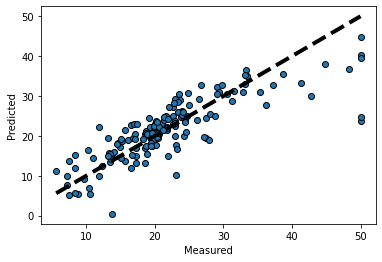

In [39]:
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')

#### 새로운 모형 생성 - 회귀나무모형

In [40]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6835179161458892

## Clustering

#### 데이터 준비

In [41]:
import numpy as np

# 데이터 표준화(또는 정규화)
# K-mean 알고리즘을 사용하기 앞서 모든 features의 scale을 맞추기위해 정규화 진행 

X = X_titanic.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.826913,0.737281,-5.921480e-01,0.432550,-0.473408,-0.502163
1,-1.565228,-1.354813,6.384304e-01,0.432550,-0.473408,0.786404
2,0.826913,-1.354813,-2.845034e-01,-0.474279,-0.473408,-0.488580
3,-1.565228,-1.354813,4.076970e-01,0.432550,-0.473408,0.420494
4,0.826913,0.737281,4.076970e-01,-0.474279,-0.473408,-0.486064
...,...,...,...,...,...,...
886,-0.369158,0.737281,-2.075923e-01,-0.474279,-0.473408,-0.386454
887,-1.565228,-1.354813,-8.228815e-01,-0.474279,-0.473408,-0.044356
888,0.826913,-1.354813,4.371893e-15,0.432550,2.007806,-0.176164
889,-1.565228,0.737281,-2.845034e-01,-0.474279,-0.473408,-0.044356


#### 군집 분석 - Kmeans
<img src="https://t1.daumcdn.net/cfile/tistory/22446C4E57FE2FC611" width=700 height=500>

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) # 군집수 결정
kmeans.fit(X) # 군집분석 실행

KMeans(n_clusters=3)

In [43]:
# 군집분석 결과보기
kmeans.labels_ 

array([0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0,
       2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1,
       0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0,

C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


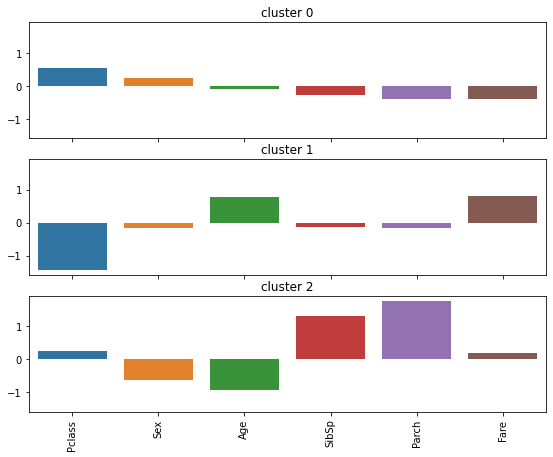

In [44]:
# 군집분석 결과해석
fig, ax = plt.subplots(kmeans.n_clusters, 1, figsize=(8,6), sharex=True, sharey=True)
ax = ax.ravel() # 다차원을 1차원으로 변환하는 메서드 
plt.tight_layout() # 자동으로 레이아웃 조정

for i in range(kmeans.n_clusters):
    ax[i].set_title('cluster %d' % i)
    sns.barplot(np.arange(X.columns.size), kmeans.cluster_centers_[i], ax=ax[i])
    ax[i].set_xticks(np.arange(X.columns.size)) # x 축 번호 지정 xticklabels 를 달기전에 꼭 번저 해야하는 코드.
    ax[i].set_xticklabels(X.columns, rotation=90) # x 축 번호에 titanic 열 이름으로 변경 

In [45]:
kmeans.cluster_centers_

array([[ 0.55195412,  0.24431645, -0.08680265, -0.28665898, -0.40210849,
        -0.40699022],
       [-1.42883385, -0.17112805,  0.7731847 , -0.14813848, -0.1686973 ,
         0.80782695],
       [ 0.26705011, -0.62777298, -0.92890161,  1.3007912 ,  1.76144409,
         0.20045637]])

C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


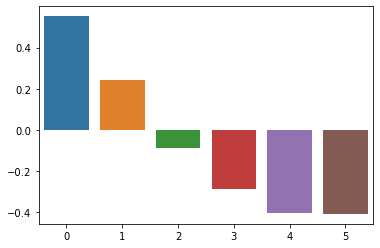

In [46]:
sns.barplot(np.arange(X.columns.size), kmeans.cluster_centers_[0]);

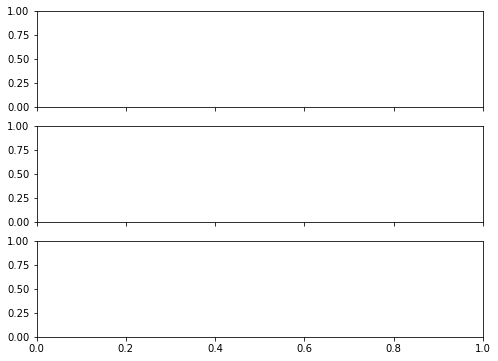

In [47]:
fig, ax = plt.subplots(kmeans.n_clusters, 1, figsize=(8,6), sharex=True, sharey=True)

In [48]:
ax

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [49]:
ax = ax.ravel()

In [50]:
ax

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


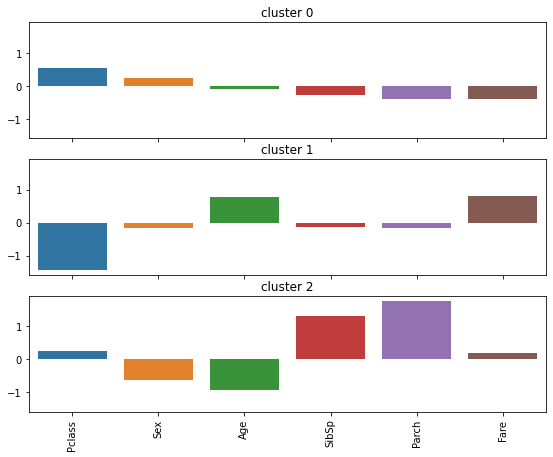

In [51]:
# 군집분석 결과해석
fig, ax = plt.subplots(kmeans.n_clusters, 1, figsize=(8,6), sharex=True, sharey=True)
plt.tight_layout() # 자동으로 레이아웃 조정

for i in range(kmeans.n_clusters):
    ax[i].set_title('cluster %d' % i)
    sns.barplot(np.arange(X.columns.size), kmeans.cluster_centers_[i], ax=ax[i])
    ax[i].set_xticks(np.arange(X.columns.size)) # x 축 번호 지정 xticklabels 를 달기전에 꼭 번저 해야하는 코드.
    ax[i].set_xticklabels(X.columns, rotation=90) # x 축 번호에 titanic 열 이름으로 변경 

<font color='tomato'><font color="#CC3D3D"><p>
# End